In [2]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One hot encoding the target variable
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Splitting the training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

100%|██████████| 74/74 [00:00<00:00, 1123.66it/s]


/Users/andreoliveira/Documents/GitHub/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/Users/andreoliveira/Documents/GitHub/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.2585 - loss: 1.7377

44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 641ms/step - accuracy: 0.2597 - loss: 1.7356 - val_accuracy: 0.3531 - val_loss: 1.5010
Epoch 2/50
 1/44 ━━━━━━━━━━━━━━━━━━━━ 36s 840ms/step - accuracy: 0.3750 - loss: 1.6457

/Users/andreoliveira/Documents/GitHub/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3750 - loss: 1.6457 - val_accuracy: 0.3503 - val_loss: 1.4737
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.3539 - loss: 1.4987

44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 619ms/step - accuracy: 0.3543 - loss: 1.4986 - val_accuracy: 0.4435 - val_loss: 1.4041
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.1875 - loss: 1.5593 - val_accuracy: 0.4463 - val_loss: 1.4193
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.4210 - loss: 1.4379

44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 553ms/step - accuracy: 0.4212 - loss: 1.4372 - val_accuracy: 0.5028 - val_loss: 1.3321
Epoch 6/50
 1/44 ━━━━━━━━━━━━━━━━━━━━ 18s 421ms/step - accuracy: 0.4688 - loss: 1.2628

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4688 - loss: 1.2628 - val_accuracy: 0.4802 - val_loss: 1.3257
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.4505 - loss: 1.3285

44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 664ms/step - accuracy: 0.4510 - loss: 1.3282 - val_accuracy: 0.4859 - val_loss: 1.3253
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5938 - loss: 1.3037 - val_accuracy: 0.4831 - val_loss: 1.3368
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.4893 - loss: 1.3569

44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 631ms/step - accuracy: 0.4896 - loss: 1.3559 - val_accuracy: 0.5367 - val_loss: 1.1982
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6250 - loss: 1.2541 - val_accuracy: 0.5141 - val_loss: 1.2508
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 688ms/step - accuracy: 0.4836 - loss: 1.3384 - val_accuracy: 0.5537 - val_loss: 1.1986
Epoch 12/50
 1/44 ━━━━━━━━━━━━━━━━━━━━ 25s 592ms/step - accuracy: 0.5000 - loss: 1.3033

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5000 - loss: 1.3033 - val_accuracy: 0.5508 - val_loss: 1.1890
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 655ms/step - accuracy: 0.5240 - loss: 1.2325 - val_accuracy: 0.5508 - val_loss: 1.1995
Epoch 14/50
 1/44 ━━━━━━━━━━━━━━━━━━━━ 23s 537ms/step - accuracy: 0.5312 - loss: 1.0370

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5312 - loss: 1.0370 - val_accuracy: 0.5593 - val_loss: 1.1714
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.5502 - loss: 1.2164

44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 611ms/step - accuracy: 0.5504 - loss: 1.2158 - val_accuracy: 0.6017 - val_loss: 1.0692
Epoch 16/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3438 - loss: 1.5132 - val_accuracy: 0.5960 - val_loss: 1.0865
Epoch 17/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 616ms/step - accuracy: 0.5260 - loss: 1.2201 - val_accuracy: 0.5819 - val_loss: 1.0702
Epoch 18/50
 1/44 ━━━━━━━━━━━━━━━━━━━━ 21s 502ms/step - accuracy: 0.5000 - loss: 1.3462

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5000 - loss: 1.3462 - val_accuracy: 0.5960 - val_loss: 1.0524
Epoch 19/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 566ms/step - accuracy: 0.5700 - loss: 1.1295 - val_accuracy: 0.6045 - val_loss: 1.1040
Epoch 20/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5625 - loss: 1.0603 - val_accuracy: 0.6215 - val_loss: 1.0737
Epoch 21/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5764 - loss: 1.0960

44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 560ms/step - accuracy: 0.5767 - loss: 1.0959 - val_accuracy: 0.6073 - val_loss: 1.0311
Epoch 22/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7500 - loss: 0.9030 - val_accuracy: 0.5847 - val_loss: 1.0464
Epoch 23/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.5867 - loss: 1.1268

44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 566ms/step - accuracy: 0.5870 - loss: 1.1259 - val_accuracy: 0.6102 - val_loss: 1.0152
Epoch 24/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6667 - loss: 0.7837 - val_accuracy: 0.6045 - val_loss: 1.0202
Epoch 25/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 561ms/step - accuracy: 0.5805 - loss: 1.1121 - val_accuracy: 0.5876 - val_loss: 1.0700
Epoch 26/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6562 - loss: 0.9126 - val_accuracy: 0.6073 - val_loss: 1.0343
Epoch 27/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 558ms/step - accuracy: 0.6127 - loss: 1.0259 - val_accuracy: 0.5480 - val_loss: 1.1784
Epoch 28/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5000 - loss: 1.3618 - val_accuracy: 0.5706 - val_loss: 1.1651


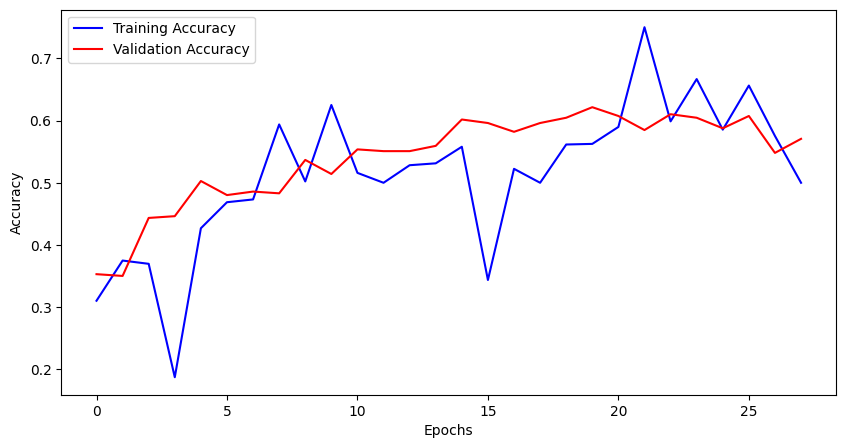

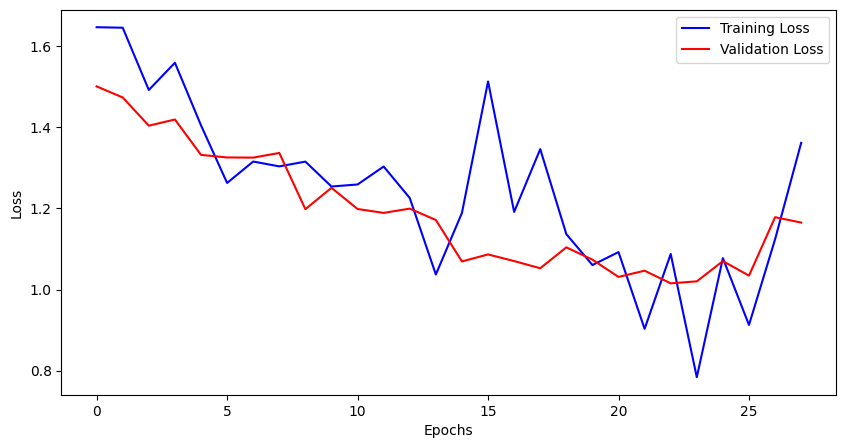

In [4]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cnn_model.h5', save_best_only=True, monitor='val_loss')

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    callbacks=[early_stopping, model_checkpoint])

# saving the model
model.save('cnn_model_data_augmentation.h5')

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
# Loading the model and evaluating it on the test set
from keras.models import load_model

model = load_model('cnn_model_data_augmentation.h5')

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
predictions = model.predict(X_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.7309 - loss: 0.8245
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step
Test Loss: 1.0504343509674072
Test Accuracy: 0.6287702918052673


F1 Score:  0.6124774023136037
Precision:  0.6333794043516319
Recall:  0.62877030162413
Accuracy:  0.62877030162413


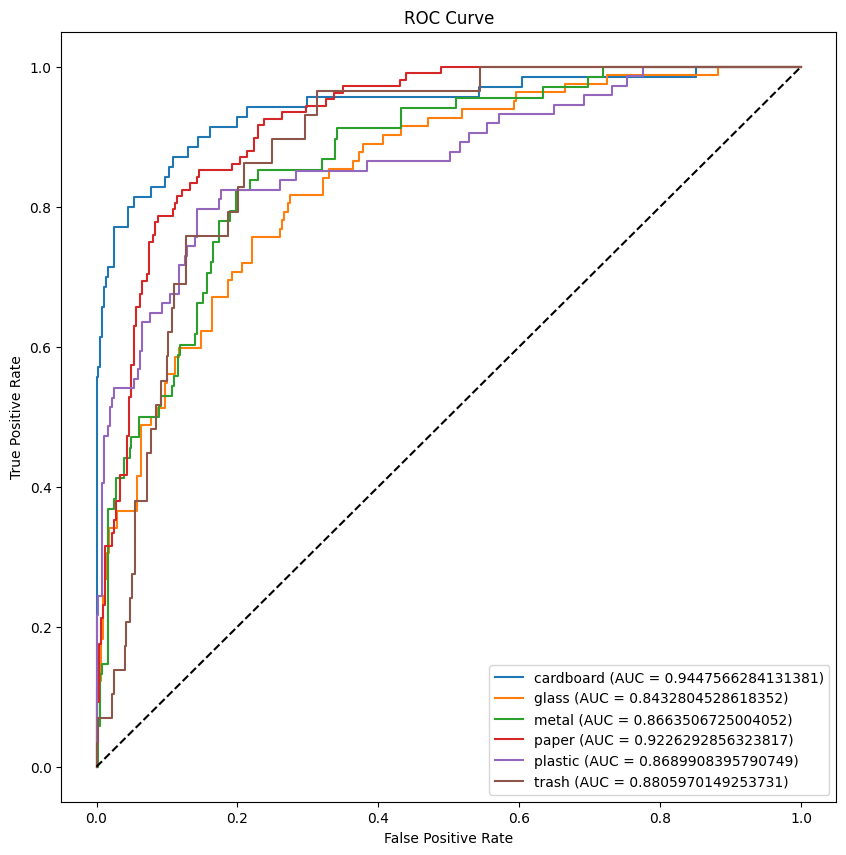

              precision    recall  f1-score   support

   cardboard       0.90      0.67      0.77        70
       glass       0.56      0.46      0.51        82
       metal       0.57      0.57      0.57        68
       paper       0.61      0.88      0.72       108
     plastic       0.60      0.66      0.63        74
       trash       0.50      0.10      0.17        29

    accuracy                           0.63       431
   macro avg       0.62      0.56      0.56       431
weighted avg       0.63      0.63      0.61       431



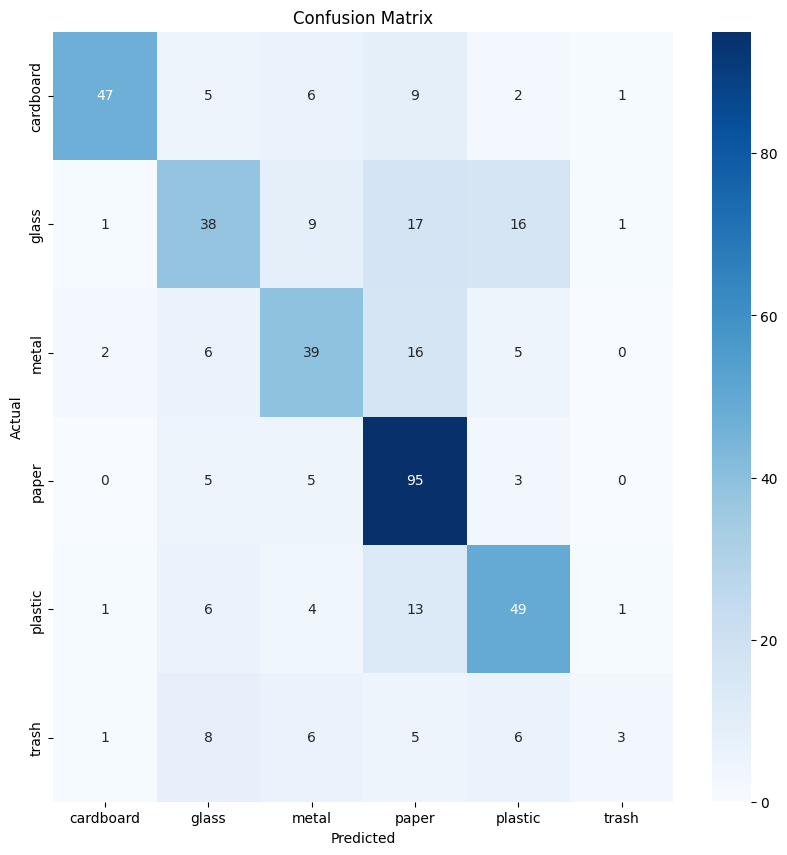

In [6]:
# Model Evaluation

# f1 score, precision, recall, accuracy, confusion matrix, classification report, and ROC curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# F1 Score
f1 = f1_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score: ", f1)

# Precision
precision = precision_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Precision: ", precision)

# Recall
recall = recall_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Recall: ", recall)

# Accuracy
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))
print("Accuracy: ", accuracy)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 10))

for i in range(6):
    plt.plot(fpr[i], tpr[i], label=classes_names[i] + ' (AUC = ' + str(roc_auc[i]) + ')')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

# Classification Report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), target_names=classes_names))

# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


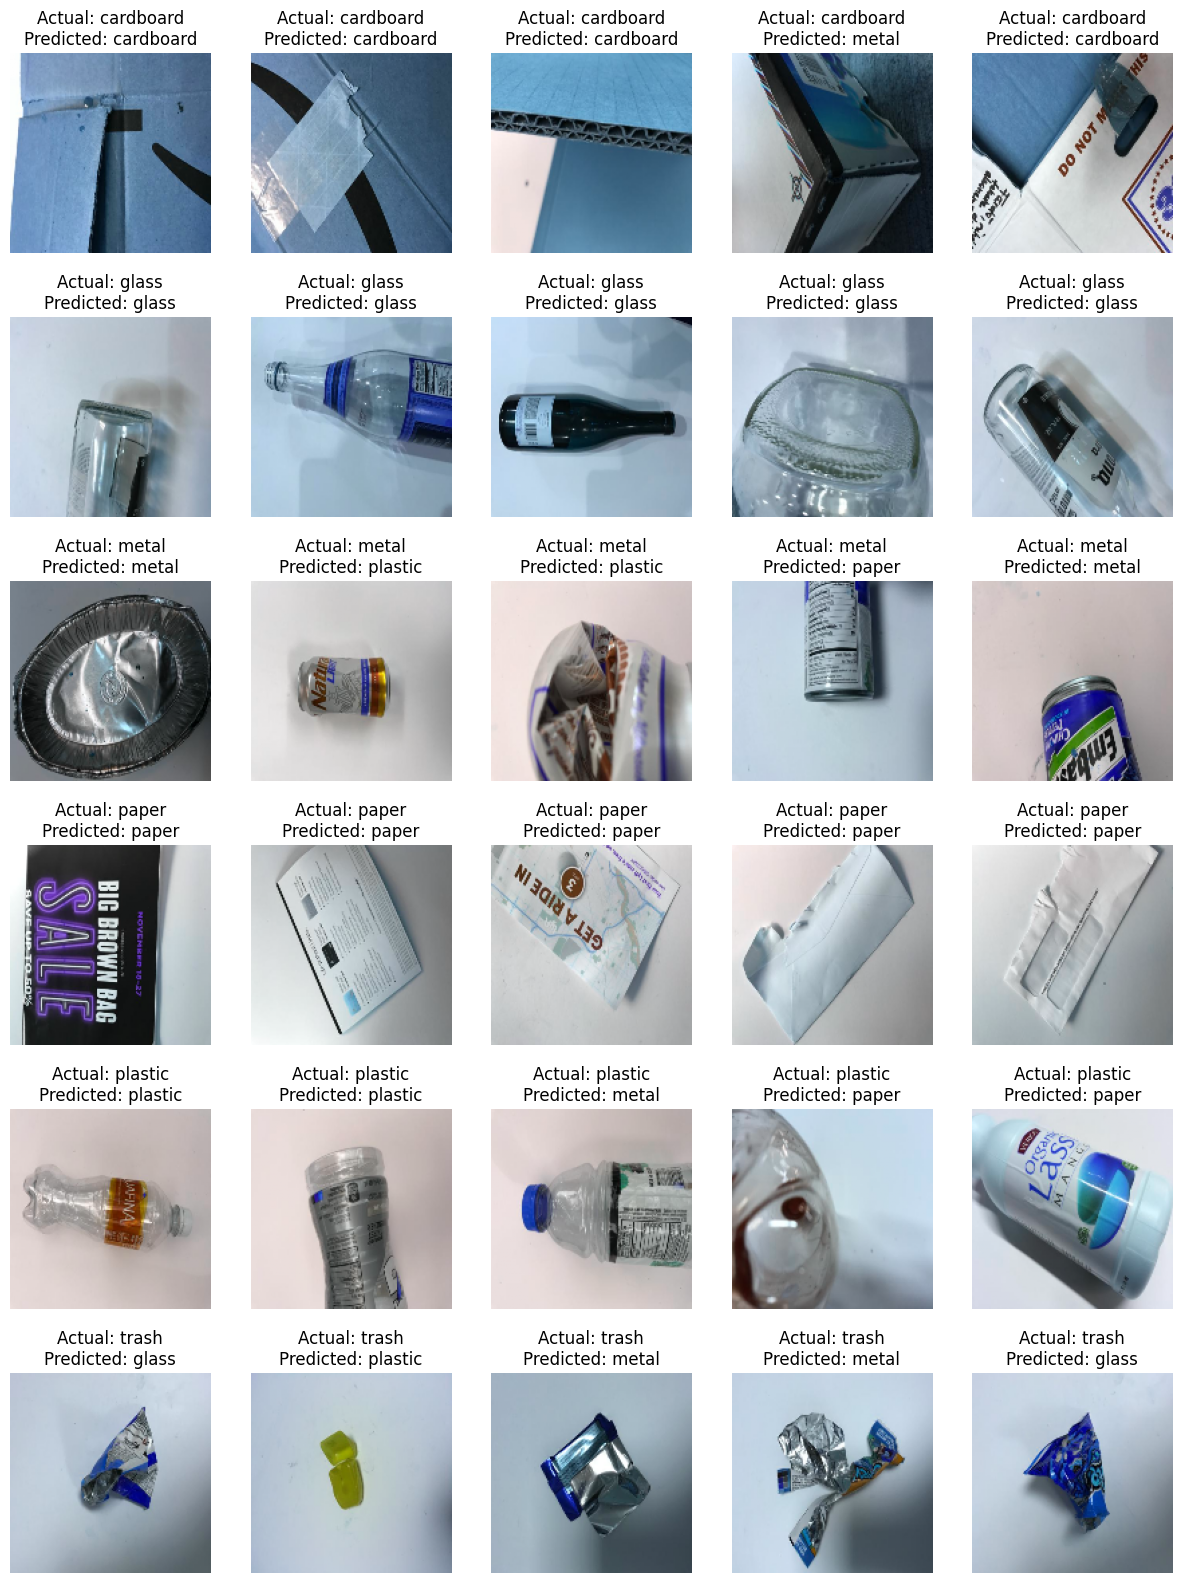

In [7]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)